In [29]:
import matplotlib.pyplot as plt
import numpy as np
from classes import * 
from copy import copy
import pickle
from scipy.special import erf

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [54]:
def rel_freqs(f0, f1, nr_kids):
    oct = np.log2(f1/f0)
    spacing = 2**(oct/nr_kids)
    powers = np.arange(nr_kids)
    f0s = f0 * (spacing)**powers
    return f0s

def p0(fs, Q, chi, sigma):
    f0 = fs[0]
    f1 = fs[-1]
    oct = np.log2(f1/f0)
    N = len(fs)
    Delta = 1-2**(oct/N)
    w = 1/Q
    n = np.arange(1,10000)
    return np.prod(1-(erf((n*Delta + chi*w)/(np.sqrt(2)*sigma)) - erf((n*Delta - chi*w)/(np.sqrt(2)*sigma)))/2)**2

In [69]:
f0_a = rel_freqs(4.15, 6.85, 612)
f0_b = rel_freqs(6.15, 7.85, 612)
Q = 40e3
lw = 4
print((p0(f0_a, Q, lw, 1e-2)+p0(f0_b, Q, lw, 1e-2))/2)


0.6989955507570305


In [70]:
np.log2(8.07/4.08)

0.9839995213062848

In [71]:
## Load chips and initiate objects

LT295chip3 = Mapping('LT295chip3_master.pkl', Q=Q, min_lw_spacing=lw)
LT343chip5 = Mapping('LT343chip5_master.pkl')
LT343chip9 = Mapping('LT343chip9_master.pkl')
LT361chip4 = Mapping('LT361chip4_master.pkl')
LT361chip4_trim = Mapping('LT361chip4_master.pkl', trim=True)
LT361chip5 = Mapping('LT361chip4_master.pkl')
LT361chip7 = Mapping('LT361chip4_master.pkl')
LT361chip8 = Mapping('LT361chip4_master.pkl')
LT402chip1 = Mapping('LT402chip1_master.pkl', Q=Q, min_lw_spacing=lw)
LT402chip5 = Mapping('LT402chip5_master.pkl')
LT402chip6 = Mapping('LT402chip6_master.pkl', Q=Q, min_lw_spacing=lw)
LT402chip6_trim = Mapping('LT402chip6_master.pkl', trim=True, Q=Q, min_lw_spacing=lw)


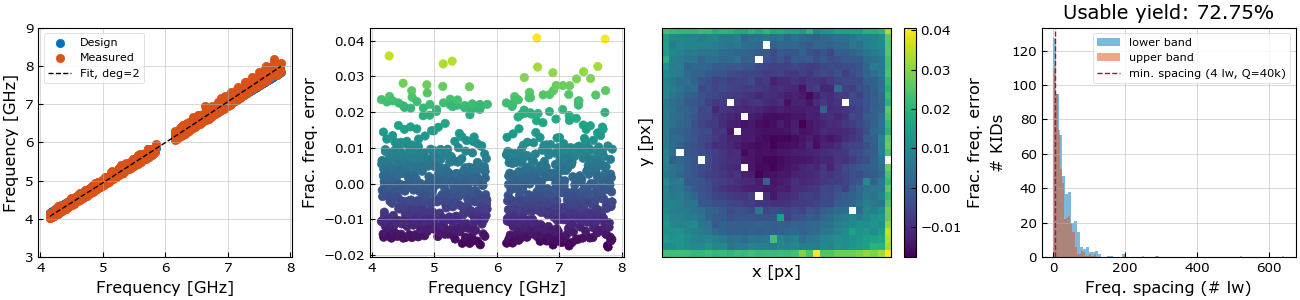

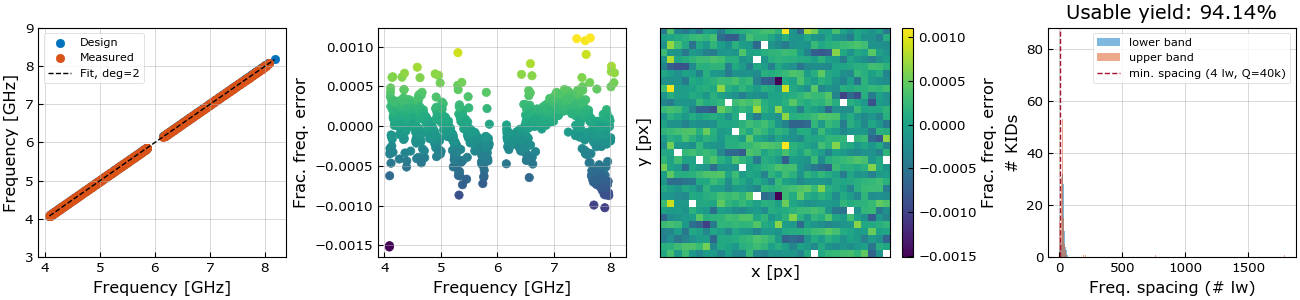

: 

In [72]:
LT402chip6.plot_overview()
LT402chip6_trim.plot_overview()

In [44]:
np.nanstd(LT402chip6.df_f_fit[LT402chip6.map])


0.010736946896130098